In [1]:
import sys
import altair as alt
alt.renderers.enable('notebook')

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline

sys.path.append('..')
from usgs_commodities.ingest import scrape_data

In [2]:
dfs = scrape_data()
lithium_df = dfs['lithium']

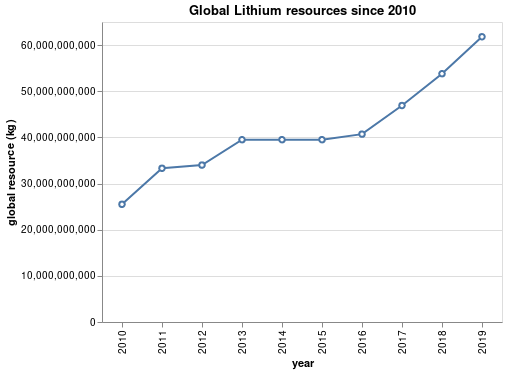

In [3]:
(alt.Chart(lithium_df, title='Global Lithium resources since 2010', width=400, height=300)
    .mark_line(
        point=dict(fill='#FFFFFF', stroke='k')
    )
    .encode(
        x='year:O',
        y='global resource (kg):Q',
        tooltip=['year',
                 'global resource (kg)', 
                 'global reserves (kg)']
    )
)

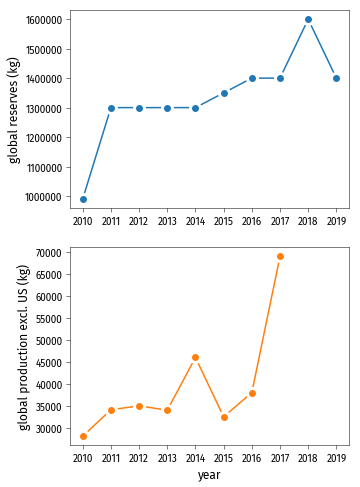

In [4]:
fig = plt.figure(figsize=(5, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex=ax1)

ax1.plot(lithium_df['year'],
        lithium_df['global reserves (kg)'],
        marker='o', markeredgecolor='w', markeredgewidth=3, markersize=10)
ax1.set_ylabel('global reserves (kg)')

ax2._get_lines.get_next_color()
ax2.plot(lithium_df['year'],
        lithium_df['global production excl. US [latest estimate] (kg)'],
        marker='o', markeredgecolor='w', markeredgewidth=3, markersize=10)
ax2.set_ylabel('global production excl. US (kg)')
ax2.set_xlabel('year')


loc = plticker.MultipleLocator(base=1.0)
ax2.xaxis.set_major_locator(loc)